## Simulation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import scipy.stats as stats
from sklearn.model_selection import train_test_split

### Plusieurs fois la simulation : avec l'hypothèse alternative

In [49]:
def power_simulation(n, m, num_simulations):

    np.random.seed(42)
    power = []
    esperances = []
    variances = []
    test_statistics = []
    test_alternative = []
    beta1 = 2
    beta2_values = np.linspace(0, 0.16, 9)
    delta_list = []

    for beta2 in beta2_values:

        differences = []

        for _ in range(num_simulations):
            epsilon = np.random.normal(0, 1, n + m)  # Generate epsilon inside the loop
            x = np.random.uniform(0, 5, n + m)
            y = beta1 * x + beta2 * x**2 + epsilon

            x_reshape = x.reshape(-1,1)

            x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=m, random_state=None)

            # Linear Model
            model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
            mse_a1 = mean_squared_error(y_test, y_pred_a1)

            # Quadratic Model
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))
            
            model_a2 = LinearRegression().fit(x_train_quad, y_train)
            y_pred_a2 = model_a2.predict(x_test_quad)
            mse_a2 = mean_squared_error(y_test, y_pred_a2)

            differences.append(mse_a1 - mse_a2)

        d_barre = sum(differences)/num_simulations 
        var = np.var(differences, ddof=1)
        test_stat = (num_simulations**0.5)*d_barre/np.sqrt(var) # Statistique pour l'hypothèse nulle

        delta = d_barre
        student = stats.t.ppf(0.95, df=num_simulations-1)
        mu = (num_simulations ** 0.5)*delta/np.sqrt(var)
        test_alt = student - mu
        puissance = 1 - stats.norm.cdf(student - mu, 0, 1)
       
        delta_list.append(delta)
        esperances.append(d_barre)
        variances.append(var)
        test_statistics.append(test_stat)
        test_alternative.append(test_alt)
        power.append(puissance)

    return esperances, variances, test_statistics, test_alternative, power


In [45]:
esperances, variances, test_statistics, test_alternative, power = power_simulation(150, 2000, 1000)

print(f"Espérances: {esperances}")
print(f"Variances: {variances}")
print(f"Statistiques de test: {test_statistics}")
print(f"Test alternative: {test_alternative}")
print(f"Puissance: {power}")

Espérances: [-0.006949415737026808, -0.006863050300380238, -0.004882160321580244, -0.0025192081125407616, -9.881932162529305e-05, 0.0038032686307182804, 0.009950584530862226, 0.01574072562023891, 0.02294192080897024, 0.030327115699938324, 0.039287087012756065, 0.04965728755452049, 0.05888759126588529, 0.07060509990975428, 0.0833682010120432]
Variances: [0.00010543762643211141, 0.0001303048202387285, 0.0001062526368941146, 0.00012085079226682555, 0.00014028976967539702, 0.00017274741247502013, 0.00016359492943951914, 0.00016325272415212237, 0.00016685922976712706, 0.0001892553723281287, 0.0002530020565585596, 0.00025009896548634016, 0.0002924975725134121, 0.0003667940494986621, 0.00041849056414590137]
Statistiques de test: [-21.401808958084235, -19.012399929846545, -14.97759829179924, -7.246683523105167, -0.26383284893678355, 9.150634859403025, 24.60161818702278, 38.957809556346035, 56.16356397746007, 69.71191288362778, 78.10661254588534, 99.2949235128852, 108.88364658710181, 116.580236

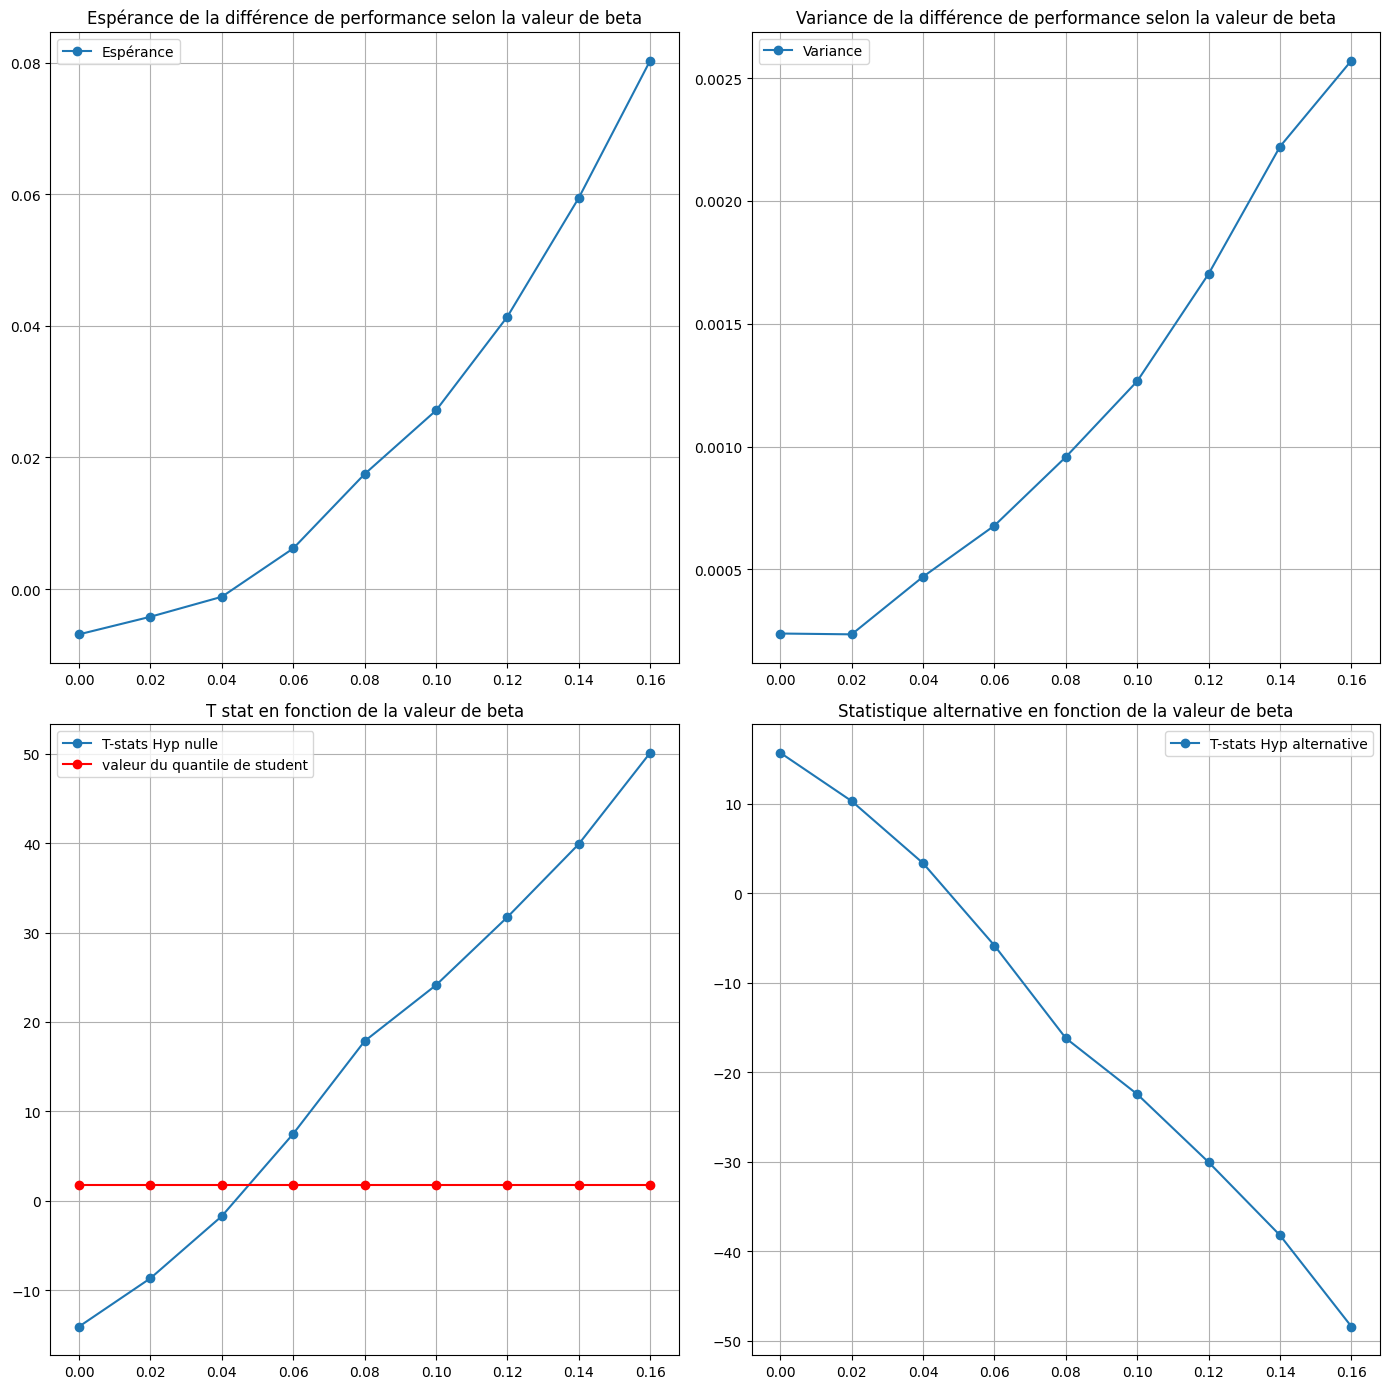

In [34]:
beta2_values = np.linspace(0, 0.16, 9)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

# Premier sous-graphe : Espérance
axes[0, 0].plot(beta2_values, esperances, label='Espérance', marker='o')
axes[0, 0].set_title('Espérance de la différence de performance selon la valeur de beta')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Deuxième sous-graphe : Variance
axes[0, 1].plot(beta2_values, variances, label='Variance', marker='o')
axes[0, 1].set_title('Variance de la différence de performance selon la valeur de beta')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Troisième sous-graphe : T-stat Hyp nulle
axes[1, 0].plot(beta2_values, test_statistics, label='T-stats Hyp nulle', marker='o')
axes[1, 0].plot(beta2_values, [stats.t.ppf(0.95, df=9)]*len(beta2_values), label='valeur du quantile de student', color='r', marker='o')
axes[1, 0].set_title('T stat en fonction de la valeur de beta')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Quatrième sous-graphe : T-stat Hyp alternative
axes[1, 1].plot(beta2_values, test_alternative, label='T-stats Hyp alternative', marker='o')
axes[1, 1].set_title('Statistique alternative en fonction de la valeur de beta')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

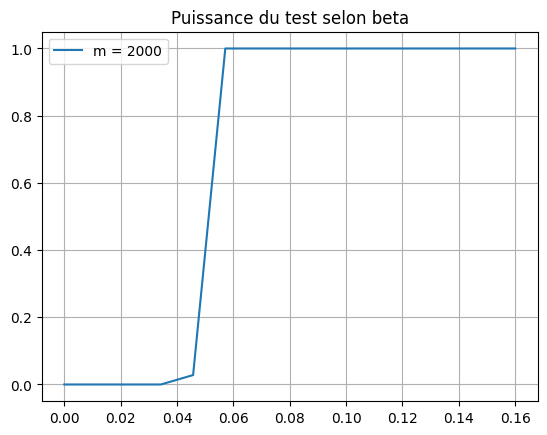

In [48]:
beta2_values = np.linspace(0, 0.16, 15)

plt.figure()
plt.title("Puissance du test selon beta")
plt.plot(beta2_values, power, label = "m = 2000")
plt.grid()
plt.legend()
plt.show()

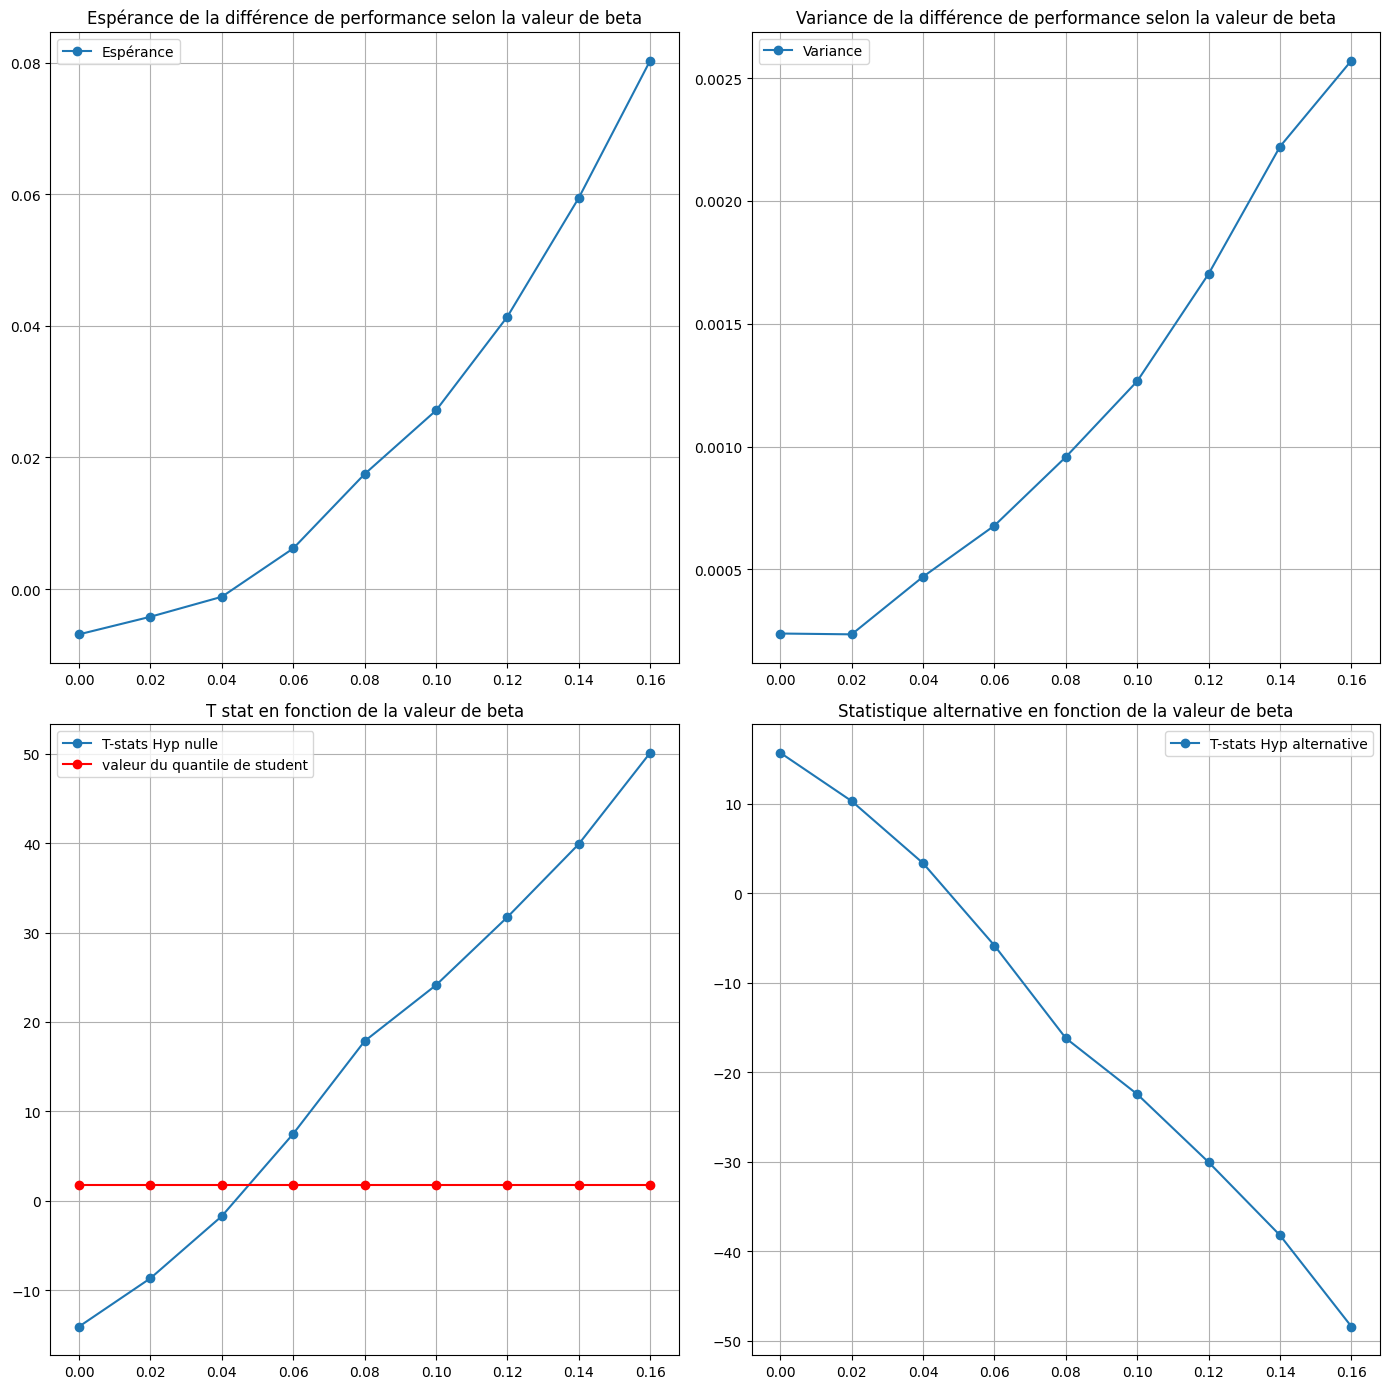

In [36]:
differences150, esperances150, variances150, test_statistics150, test_alternative150, power150 = power_simulation(150, 150, 1000)

beta2_values = np.linspace(0, 0.16, 9)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

# Premier sous-graphe : Espérance
axes[0, 0].plot(beta2_values, esperances150, label='Espérance', marker='o')
axes[0, 0].set_title('Espérance de la différence de performance selon la valeur de beta')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Deuxième sous-graphe : Variance
axes[0, 1].plot(beta2_values, variances150, label='Variance', marker='o')
axes[0, 1].set_title('Variance de la différence de performance selon la valeur de beta')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Troisième sous-graphe : T-stat Hyp nulle
axes[1, 0].plot(beta2_values, test_statistics150, label='T-stats Hyp nulle', marker='o')
axes[1, 0].plot(beta2_values, [stats.t.ppf(0.95, df=9)]*len(beta2_values), label='valeur du quantile de student', color='r', marker='o')
axes[1, 0].set_title('T stat en fonction de la valeur de beta')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Quatrième sous-graphe : T-stat Hyp alternative
axes[1, 1].plot(beta2_values, test_alternative150, label='T-stats Hyp alternative', marker='o')
axes[1, 1].set_title('Statistique alternative en fonction de la valeur de beta')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (15,) and (9,)

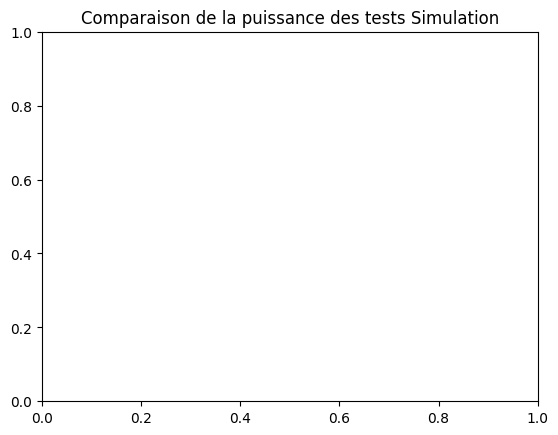

In [47]:
plt.figure()
plt.title("Comparaison de la puissance des tests Simulation")
plt.plot(beta2_values, power150, label = "m = 150", color = "Blue")
plt.plot(beta2_values, power, label = "m = 2000", color = "Red")
plt.grid()
plt.legend()
plt.show()

In [24]:
df_150 = pd.DataFrame(power150)
df_2000 = pd.DataFrame(power)